# AN INTRODUCTORY EXAMPLE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme();
import statsmodels.formula.api as sm

#from sklearn.preprocessing import scale
#import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
import statistics as st
#from scipy import linalg

**SCENARIO**: You are working with the marketing department of a car seller. Our boss asked you to create a report on sales and identify possible areas of development. We have the excel file provided by IT department. 

First I load all the excel file directly in a table

In [97]:
# Load CSV file on local
sales_table = pd.read_csv('./data/sales_data.csv')

url = 'https://raw.githubusercontent.com/pal-dev-labs/Python-for-Economic-Applications/main/Data/sales_data.csv'
#sales_table = pd.read_csv(url)

In [98]:
sales_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             157 non-null    int64  
 1   Manufacturer           157 non-null    object 
 2   Model                  157 non-null    object 
 3   Sales_in_thousands     157 non-null    float64
 4   Price_in_thousands     157 non-null    float64
 5   TV Advert (thousands)  157 non-null    float64
 6   Social Advert          157 non-null    int64  
 7   Engine_size            157 non-null    float64
 8   Horsepower             157 non-null    float64
 9   Wheelbase              157 non-null    float64
 10  Width                  157 non-null    float64
 11  Length                 157 non-null    float64
 12  Curb_weight            157 non-null    float64
 13  Fuel_capacity          157 non-null    float64
 14  Fuel_efficiency        157 non-null    float64
 15  Latest

In [90]:
sales_table

,Unnamed: 0,Manufacturer,Model,Sales_in_thousands,Price_in_thousands,TV Advert (thousands),Social Advert,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Awarded
0,0,Acura,Integra,16.919,21.50,142.516144,53481,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,0
1,1,Acura,TL,39.384,28.40,383.026416,39441,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778,0
2,2,Acura,CL,14.114,0.00,165.928640,44114,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,0.000000,0
3,3,Acura,RL,8.588,42.00,63.259267,98103,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779,0
4,4,Audi,A4,20.397,23.99,156.508762,38450,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,152,Volvo,V40,3.545,24.40,70.518707,28535,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812,0
153,153,Volvo,S70,15.245,27.50,171.875269,117895,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495,0
154,154,Volvo,V70,17.531,28.80,172.154270,102228,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978,0
155,155,Volvo,C70,3.493,45.50,29.538936,100522,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357,0


I want to know how many different models each Manifacturer has

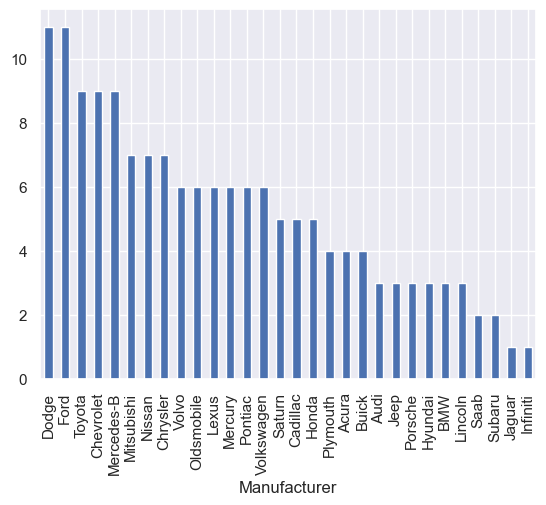

In [100]:
sales_table['Manufacturer'].value_counts().plot.bar();

I want to save this image for my future report. I need a nicer figure

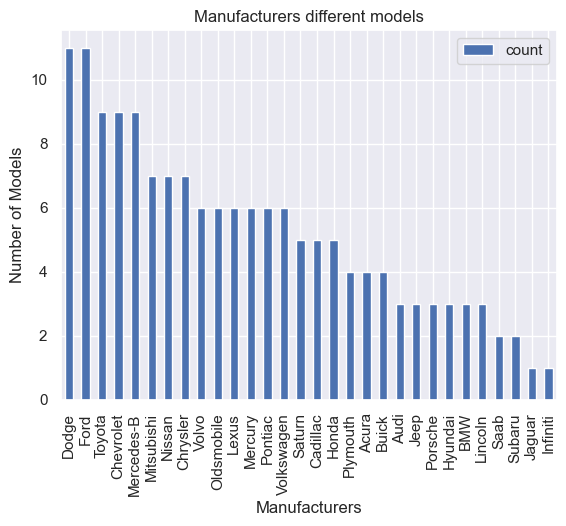

In [101]:
sales_table['Manufacturer'].value_counts().plot.bar()
plt.xlabel('Manufacturers')
plt.ylabel('Number of Models')
plt.title('Manufacturers different models')
plt.legend()
plt.savefig('manufacturer.png')  # this saves the figure i

# TABLE MANIPULATION

I want to extract total amount of sales for each manufacturer

In [102]:
total_sales = pd.pivot_table(sales_table, index=['Manufacturer'], values=['Sales_in_thousands'],aggfunc=[np.sum])
total_sales

,sum
,Sales_in_thousands
Manufacturer,
Acura,79.005
Audi,40.557
BMW,46.505
Buick,242.019
Cadillac,112.178
Chevrolet,554.365
Chrysler,201.721
Dodge,910.149


Let's order a little bit

In [103]:
total_sales = total_sales.sort_values(by=('sum', 'Sales_in_thousands'), ascending=False)
total_sales

,sum
,Sales_in_thousands
Manufacturer,
Ford,2022.635
Dodge,910.149
Toyota,740.205
Honda,592.674
Chevrolet,554.365
Nissan,399.635
Pontiac,370.534
Jeep,293.153


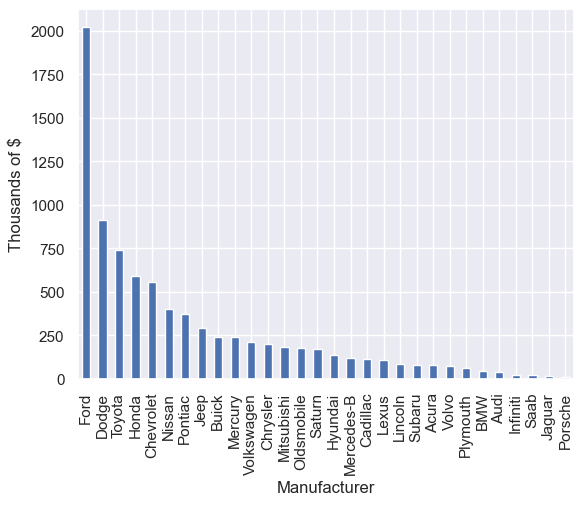

In [105]:
total_sales.plot.bar(legend = False)
plt.ylabel('Thousands of $');

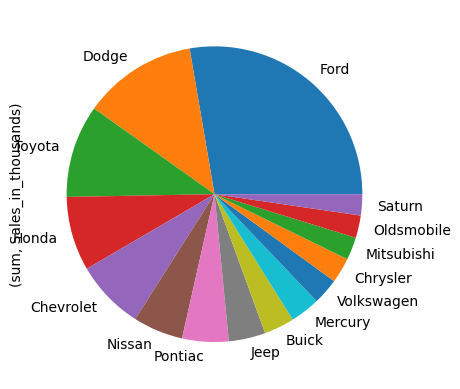

In [16]:
total_sales.iloc[0:15].plot.pie(subplots=True, legend= False);

In [186]:
"""
column = sales_table['Sales_in_thousands'].values
list1 = []
for i in range(len(column)):
    list1.append(int(column[i]*100000 + np.random.randn()*8000000))
newcol = np.array(list1)
newcol = np.abs(newcol)
sales_table.insert(6,'TV Advert', newcol)
list2 = []
for i in range(len(column)):
    list2.append(int(((column[i])**2) + np.random.randn()*50000))
newcol = np.array(list2)
newcol = np.abs(newcol)
sales_table.insert(7,'Social Advert', newcol)
sales_table.to_csv('sales_data.csv')
"""

## I would like to understand if there are factors that influence the sales

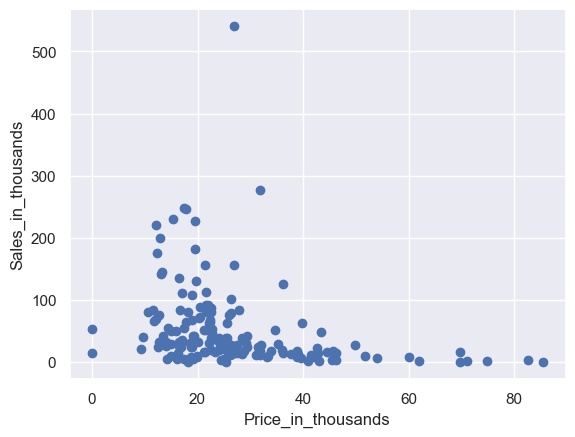

In [120]:
plt.scatter(sales_table['Price_in_thousands'].values, sales_table['Sales_in_thousands'].values)
plt.xlabel("Price_in_thousands");plt.ylabel("Sales_in_thousands");

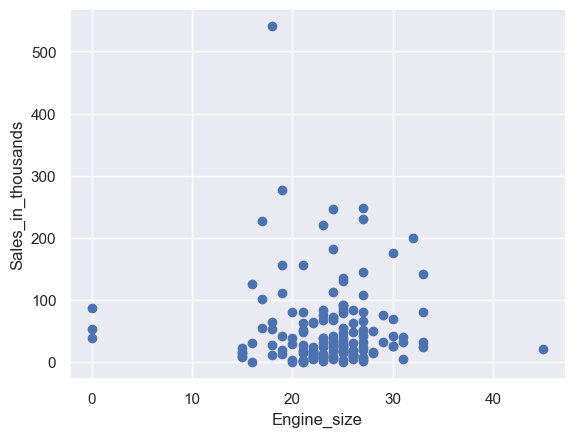

In [116]:
plt.scatter(sales_table['Fuel_efficiency'].values, sales_table['Sales_in_thousands'].values)
plt.xlabel("Engine_size");plt.ylabel("Sales_in_thousands");

## Let's try with more features

/Users/giando/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


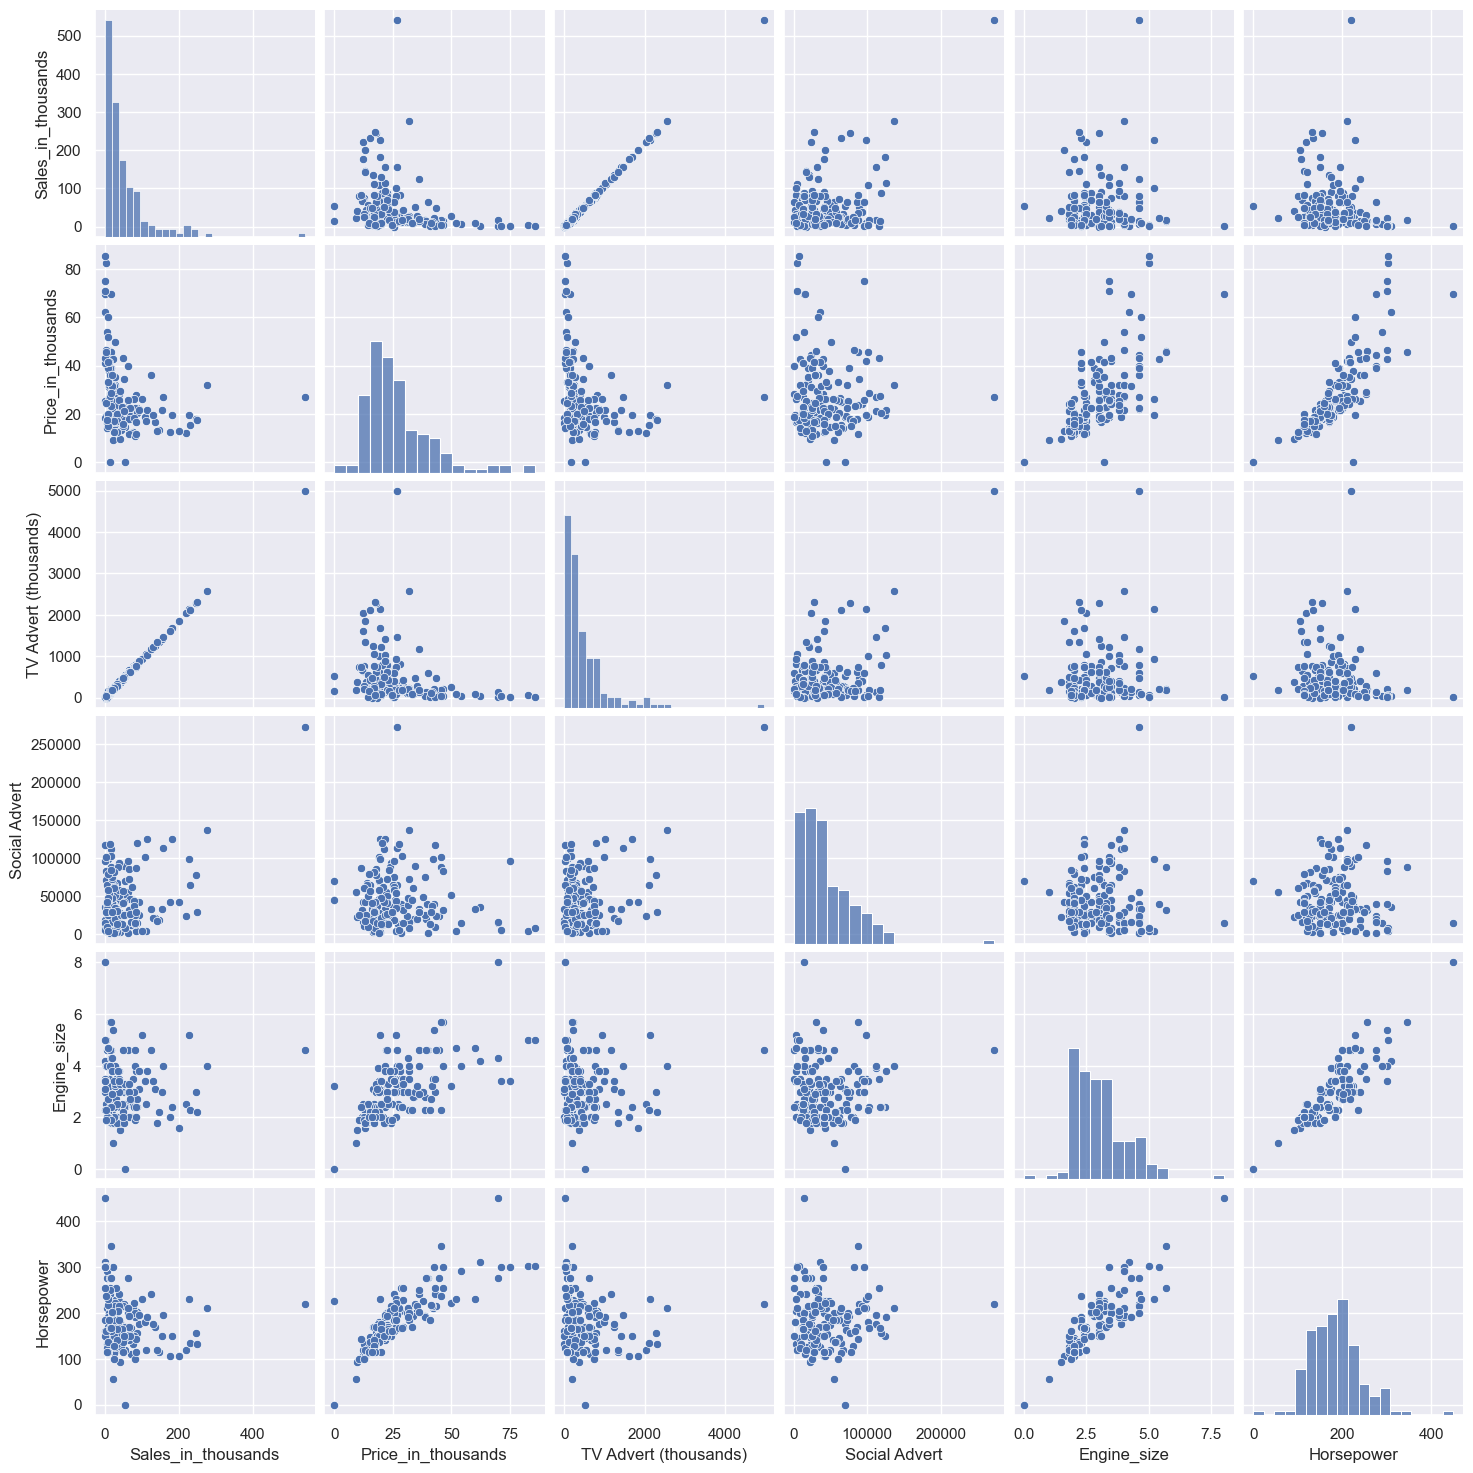

In [118]:
sns.pairplot(sales_table.iloc[:,[3,4,5,6,7,8]]);

## Price, TV Advertising (very correlated) and Social Advertising seems interesting

## Let's try to calculate a correlation 

In [135]:
cor_tv = sales_table['Sales_in_thousands'].corr(sales_table['TV Advert (thousands)'])
cor_social = sales_table['Sales_in_thousands'].corr(sales_table['Social Advert'])
cor_price = sales_table['Sales_in_thousands'].corr(sales_table['Price_in_thousands'])
print("Correlation between Sales and TV Advertising:", cor_tv)
print("Correlation between Sales and Social Advertising:", cor_social)
print("Correlation between Sales and Price:", cor_price)

Correlation between Sales and TV Advertising: 0.9993329337138769
Correlation between Sales and Social Advertising: 0.40834603089512705
Correlation between Sales and Price: -0.2907502878534738


In [148]:
table1 = sales_table[['Sales_in_thousands','TV Advert (thousands)']]
table1 = table1.rename(columns={'TV Advert (thousands)': 'TV'})

#model = sm.ols('Sales_in_thousands ~ TV Advert (thousands)', data=sales_table)


In [149]:
table1

,Sales_in_thousands,TV
0,16.919,142.516144
1,39.384,383.026416
2,14.114,165.928640
3,8.588,63.259267
4,20.397,156.508762
...,...,...
152,3.545,70.518707
153,15.245,171.875269
154,17.531,172.154270
155,3.493,29.538936


In [144]:
type(table1)

pandas.core.series.Series

In [172]:
import statsmodels.formula.api as sm

# Specify the linear regression model
model = sm.ols('Sales_in_thousands ~ TV', data=table1)

# Fit the model to the data
results = model.fit()

# Print the model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     Sales_in_thousands   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.161e+05
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          9.96e-225
Time:                        22:24:19   Log-Likelihood:                -365.15
No. Observations:                 157   AIC:                             734.3
Df Residuals:                     155   BIC:                             740.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0415      0.253     -0.164      0.8

In [177]:
model.predict

<bound method RegressionModel.predict of <statsmodels.regression.linear_model.OLS object at 0x2adee85d0>>

In [152]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [186]:
# Split the data into features and target
X = sales_table[['Fuel_efficiency', 'Power_perf_factor']]
y = sales_table['Awarded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [185]:
y

0      0
1      0
2      0
3      0
4      0
      ..
152    0
153    0
154    0
155    0
156    0
Name: Awarded, Length: 157, dtype: int64

In [188]:
# Create a sequential model
model = Sequential()

# Add a dense layer with 10 neurons and the relu activation function
model.add(Dense(10, activation='relu', input_shape=(2,)))

# Add a dense layer with 1 neuron and the sigmoid activation function
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [189]:
# Train the model on the training set
model.fit(X_train, y_train, epochs=100);

Epoch 1/100
4/4 [==============================] - 0s 908us/step - loss: 3.5878 - accuracy: 0.9316
Epoch 2/100
4/4 [==============================] - 0s 831us/step - loss: 3.4718 - accuracy: 0.9316
Epoch 3/100
4/4 [==============================] - 0s 884us/step - loss: 3.3563 - accuracy: 0.9316
Epoch 4/100
4/4 [==============================] - 0s 776us/step - loss: 3.2233 - accuracy: 0.9316
Epoch 5/100
4/4 [==============================] - 0s 829us/step - loss: 3.1205 - accuracy: 0.9316
Epoch 6/100
4/4 [==============================] - 0s 859us/step - loss: 2.9957 - accuracy: 0.9316
Epoch 7/100
4/4 [==============================] - 0s 785us/step - loss: 2.8744 - accuracy: 0.9316
Epoch 8/100
4/4 [==============================] - 0s 805us/step - loss: 2.8060 - accuracy: 0.9316
Epoch 9/100
4/4 [==============================] - 0s 700us/step - loss: 2.6781 - accuracy: 0.9316
Epoch 10/100
4/4 [==============================] - 0s 734us/step - loss: 2.5766 - accuracy: 0.9316
Epoch 11/

In [190]:
# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)

# Print the loss and accuracy
print('Loss:', loss)
print('Accuracy:', accuracy)

2/2 [==============================] - 0s 2ms/step - loss: 0.1584 - accuracy: 0.9000
Loss: 0.15839827060699463
Accuracy: 0.8999999761581421


In [192]:
# Make predictions on new data
new_data = np.array([[1, 2]])
predictions = model.predict(new_data)

# Print the predictions
print('Predictions:', predictions)

1/1 [==============================] - 0s 22ms/step
Predictions: [[0.43248156]]


## Everything Is an Object
Python is an **object-oriented programming language (OOPP)** and in Python everything is an object.

In object-oriented programming languages like Python, an object is an entity that contains data along with associated metadata and/or functionality. 

In Python **everything is an object**, which means every entity has some metadata (called **attributes** or **fields**) and associated functionality (called **methods**). These attributes and methods are accessed via the dot syntax.

Example of objects are the integers numbers **1,2,3** or the symbols **"a"**,**"B"**,**"?"**. A "bigger" object could be a containers of numbers **[1,2,3,4...,9,..,101]**

As objects are so fundamental, Python has already some built-in objects, like numbers and characters

Let's create an object **a**

In [9]:
"a"

'a'

We use the characters "" to create the object **'a'** whose data is the symbol *a*

Let's create an object that is a number

In [11]:
3

3

the object **3** contains the symbol 3 (that python considers as the mathematical value 3

Consider now

In [14]:
"3"

'3'

The object **'3'** is different from the object **3**. The first is the character *3* the second is the mathematical value 3

Different objects behave differently when we apply operations

In [18]:
3+3

6

In [22]:
"3"+"3"

'33'

Objects contain not only data or information but also **fields** and **methods**. We can use **dot** notation to access fields and methods

For example **capitalize** is a method to capitalize a symbol contained in a character object. It **produces** a new object that is the capitalized character


In [29]:
# capitalize is a method to capitalize the symbol a contained in the object 'a'. It produces the new object 'A'
"a".capitalize()

'A'

In [2]:
"A".lower()

'a'

The following picture summarize the objects creation process. We can note that every objects has a **TYPE** (or we can say it belongs to a **CLASS**)

<img src="fig/objects1.png">


# Types
Objects have type information attached. 

There are built-in simple types offered by Python and several compound types, which will be discussed in the following lessons.

Python's simple types are summarized in the following table:

<center>**Python Scalar Types**</center>

| Type        | Example        | Description                                                  |
|-------------|----------------|--------------------------------------------------------------|
| ``int``     | ``x = 1``      | integers (i.e., whole numbers)                               |
| ``float``   | ``x = 1.0``    | floating-point numbers (i.e., real numbers)                  |
| ``complex`` | ``x = 1 + 2j`` | Complex numbers (i.e., numbers with real and imaginary part) |
| ``bool``    | ``x = True``   | Boolean: True/False values                                   |
| ``str``     | ``x = 'abc'``  | String: characters or text                                   |
| ``NoneType``| ``x = None``   | Special object indicating nulls                              |

We'll take a quick look at each of these in turn.

In [3]:
type(3)

int

In [4]:
type("A")

str

In [5]:
type(1.5)

float

## Python Variables
Let's see how python manages variables.

We're going to assign the int value *10* to a variable named *a*, the str value "Stefano" to a variable named *name1* and a float *12.8* value to a variable named *c*

In [7]:
# assignment instructions

a = 10     # assign 10 to variable a 
name1 = "Stefano"
c = 12.8

## Python Variables Are Pointers

Assigning variables in Python is as easy as putting a variable name to the left of the equals (``=``) sign:

```python
# assign 4 to the variable x
a = 10
```

It seems as we create a space in memory, named a, and insert directly the value 10 in that space.

This is not the way in which Python works.

In Python variables are best thought of not as containers but as **pointers**.
So in Python, when you write

```python
a = 10
```

you are essentially defining a *pointer* named ``a`` that points to an object in memory that contains the value ``10``. The right part of the assignment instruction above, creates an int object in memory and assignes the address memory of that object to the pointer ``a``. 


In this way, variable a is able to accesso all the information of the object, including value, fields and methods.


In [21]:
a = "corso python tor vergata"
a

'corso python tor vergata'

In [22]:
type(a)

str

In [34]:
a.capitalize()

'Corso python tor vergata'

In [20]:
a.split()

['corso', 'python', 'tor', 'vergata']


Note one consequence of this: because Python variables just point to various objects, there is no need to "declare" the variable, or even require the variable to always point to information of the same type!
This is the sense in which people say Python is *dynamically-typed*: variable names can point to objects of any type.
So in Python, you can do things like this:

In [23]:
x = 1         # x is an integer
x = 'hello'   # now x is a string

There is a consequence of this "variable as pointer" approach that you need to be aware of. If we have two variable names pointing to the same mutable object, then changing one will change the other as well! For example, let's create and modify a list:

In [25]:
x = [1, 2, 3]
y = x

We've created two variables ``x`` and ``y`` which both point to the same object.
Because of this, if we modify the list via one of its names, we'll see that the "other" list will be modified as well:

In [27]:
print(y)

[1, 2, 3]


In [28]:
x.append(4) # append 4 to the list pointed to by x
print(y) # y's list is modified as well!

[1, 2, 3, 4]


This behavior might seem confusing if you're wrongly thinking of variables as buckets that contain data.
But if you're correctly thinking of variables as pointers to objects, then this behavior makes sense.

Note also that if we use "``=``" to assign another value to ``x``, this will not affect the value of ``y`` – assignment is simply a change of what object the variable points to:

In [30]:
x = 'something else'
print(y)  # y is unchanged

[1, 2, 3, 4]


Again, this makes perfect sense if you think of x and y as pointers, and the "=" operator as an operation that changes what the name points to.

You might wonder whether this pointer idea makes arithmetic operations in Python difficult to track, but Python is set up so that this is not an issue. Numbers, strings, and other simple types are immutable: you can't change their value – you can only change what values the variables point to. So, for example, it's perfectly safe to do operations like the following:

In [32]:
x = 10
y = x
x += 5  # add 5 to x's value, and assign it to x
print("x =", x)
print("y =", y)

x = 15
y = 10


When we call ``x += 5``, we are not modifying the value of the ``10`` object pointed to by ``x``; we are rather changing the variable ``x`` so that it points to a new integer object with value ``15``.
For this reason, the value of ``y`` is not affected by the operation.

## Arithmetic Operations
Python implements seven basic binary arithmetic operators, two of which can double as unary operators.
They are summarized in the following table:

| Operator     | Name           | Description                                            |
|--------------|----------------|--------------------------------------------------------|
| ``a + b``    | Addition       | Sum of ``a`` and ``b``                                 |
| ``a - b``    | Subtraction    | Difference of ``a`` and ``b``                          |
| ``a * b``    | Multiplication | Product of ``a`` and ``b``                             |
| ``a / b``    | True division  | Quotient of ``a`` and ``b``                            |
| ``a // b``   | Floor division | Quotient of ``a`` and ``b``, removing fractional parts |
| ``a % b``    | Modulus        | Integer remainder after division of ``a`` by ``b``     |
| ``a ** b``   | Exponentiation | ``a`` raised to the power of ``b``                     |
| ``-a``       | Negation       | The negative of ``a``                                  |
| ``+a``       | Unary plus     | ``a`` unchanged (rarely used)                          |

These operators can be used and combined in intuitive ways, using standard parentheses to group operations.
For example:

In [36]:
# addition, subtraction, multiplication
(4 + 8) * (6.5 - 3)

42.0

## Comparison Operations

Another type of operation which can be very useful is comparison of different values.
For this, Python implements standard comparison operators, which return Boolean values ``True`` and ``False``.
The comparison operations are listed in the following table:

| ``a == b``| ``a`` equal to ``b``      
| ``a != b`` | ``a`` not equal to ``b``             
| ``a < b``| ``a`` less than ``b``         
| ``a > b``| ``a`` greater than ``b``             
| ``a <= b``| ``a`` less than or equal to ``b``
|``a >= b`` | ``a`` greater than or equal to ``b``



These comparison operators can be combined with the arithmetic and bitwise operators to express a virtually limitless range of tests for the numbers.
For example, we can check if a number is odd by checking that the modulus with 2 returns 1:

In [37]:
2 < 1

False

In [38]:
# 25 is odd
25 % 2 == 1

True

In [39]:
# check if a is between 15 and 30
a = 25
15 < a < 30

True

## Boolean Operations
When working with Boolean values, Python provides operators to combine the values using the standard concepts of "and", "or", and "not".
Predictably, these operators are expressed using the words ``and``, ``or``, and ``not``:

In [15]:
x = 4
(x < 6) and (x > 2)

True

In [16]:
(x > 10) or (x % 2 == 0)

True

In [17]:
not (x < 6)

False

Boolean algebra aficionados might notice that the XOR operator is not included; this can of course be constructed in several ways from a compound statement of the other operators.
Otherwise, a clever trick you can use for XOR of Boolean values is the following:

In [18]:
# (x > 1) xor (x < 10)
(x > 1) != (x < 10)

False

These sorts of Boolean operations will become extremely useful when we begin discussing *control flow statements* such as conditionals and loops.

One sometimes confusing thing about the language is when to use Boolean operators (``and``, ``or``, ``not``), and when to use bitwise operations (``&``, ``|``, ``~``).
The answer lies in their names: Boolean operators should be used when you want to compute *Boolean values (i.e., truth or falsehood) of entire statements*.
Bitwise operations should be used when you want to *operate on individual bits or components of the objects in question*.